# Predicting Profit for 50 Startups by using Multiple Linear Regression and Python

## Data Preprocessing
## Importing Libraries and Datasets

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#### Below comand shows there are total 50 rows and 5 columns in the input dataset.

In [3]:
# shape Of the Data Set
print(dataset.shape)

(50, 5)


## Summarize the Dataset

In [4]:
# more info on the data
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB
None


In [5]:
# descriptions/Statistical Summary
print(dataset.describe())

           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


## Data Visualization
#### We'll achieve this by using Univariate plots.
#### Univariate plots - Given that the input variables are numeric, we can create box plot of each.This will tell us a more clear idea of the distribution of the input attributes
#### From the below graph we can see there is a linear relationship between Profit and R&D Spend.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1FD9CC9E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001D1FDCE8828>]], dtype=object)

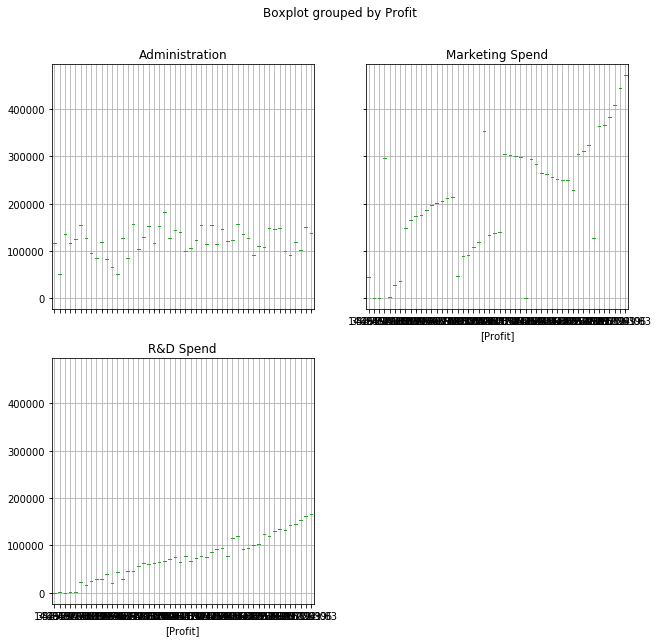

In [6]:
# boxplot on each feature split out by profit
dataset.boxplot(by="Profit",figsize=(10,10))

In [7]:
# Importing the dataset into dependent and independent variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [8]:
# Splitting the dataset into the Training set and Test set. X1_Test from this split will be used for final submission.
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

C:\Users\Prasanna Mohanty\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Prasanna Mohanty\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [10]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [14]:
y_pred

array([ 103015.20159796,  132582.27760815,  132447.73845175,
         71976.09851258,  178537.48221056,  116161.24230166,
         67851.69209676,   98791.73374687,  113969.43533013,
        167921.06569551])

In [15]:
#Building the optimal model using backward Elimination
import statsmodels.formula.api as sm
X=np.append(arr= np.ones((50, 1)).astype(int), values = X, axis=1)
#X_opt = X[:, [0, 1, 2, 3, 4, 5]]
#X_opt = X[:, [0, 1, 3, 4, 5]]
#X_opt = X[:, [0, 3, 4, 5]]
#X_opt = X[:, [0, 3, 5]]
X_opt = X[:, [0, 3]]
regressor_OLS = sm.OLS(endog=y, exog= X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 21 Feb 2020   Prob (F-statistic):           3.50e-32
Time:                        17:59:04   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##  Writing The Test Data + Predicted Column  Into CSV File

In [16]:
df1 = pd.DataFrame(X1_test)
df2 = pd.DataFrame(y_pred)
submission = pd.concat([df1,df2],axis = 1)
submission.to_csv('submission.csv', index=False)
submission

,0,1,2,3,0
0,66051.5,182646,118148,Florida,103015.201598
1,100672,91790.6,249745,California,132582.277608
2,101913,110594,229161,Florida,132447.738452
3,27892.9,84710.8,164471,Florida,71976.098513
4,153442,101146,407935,Florida,178537.482211
5,72107.6,127865,353184,New York,116161.242302
6,20229.6,65947.9,185265,New York,67851.692097
7,61136.4,152702,88218.2,New York,98791.733747
8,73994.6,122783,303319,Florida,113969.435330
9,142107,91391.8,366168,Florida,167921.065696
